# From Genomes to Traits: Reverse Ecology of Uncultivated Freshwater Actinobacteria

### Background and Preliminary Data

#### Trait-Based Ecology
Microbes are critical players in all ecosystems, where they support essential ecosystem functions. While microbes have tremendous influence on ecosystems, microbial ecologists do not have robust approaches to translate microbial-level observations to ecosystem-scale predictions. A better understanding of the microbial contribution to ecosystem behavior will enable more accurate predictions of ecosystem response to drivers such as climate change, as well as the impact these changes will have on ecosystem functions.

Trait-based approaches represent a promising approach for achieving such an understanding: their focus on the measurable properties of an organism (e.g., amino acid requirements, pH sensitivity) enables a mechanistic understanding of species-environment relationships. As a result, the application of trait-based approaches to microbial ecology has the potential to produce generalizable principles that elevate descriptive and correlative studies to a predictive level.

Bacterial communities in freshwater lakes are compelling model systems for which to develop a scaled-up understanding, as these bacteria drive the cycling of most biologically active elements in their ecosystems. In addition, existing heterogeneous datasets, laboratory experiments, and field observations contain a tremendous amount of information about the composition, dynamics, and environmental context of freshwater microbial communities. Of the freshwater bacteria, Actinobacteria are often the numerically dominant phylum, with phylotypes exhibiting contrasting dynamics through time. Nonetheless, the genetic basis underlying this niche partitioning remains unclear. As a result, the Actinobacteria represent a model phylum for linking genomic content to relevant microbial traits.

#### Preliminary Data
The McMahon laboratory has learned a tremendous amount about the ecology of freshwater lake bacteria in the past decade. They have developed a curated taxonomy for freshwater microbes, which uses a controlled nomenclature of phylum/lineage/clade/tribe to classify microbes based on 16S rRNA sequences. A total of 79 tribes have been identified, with the Actinobacteria comprising nine lineages, 14 clades, and 32 tribes. Some tribes seem to niche partition based on pH and water chemistry (associated with carbon source, terrestrial vs. aquatic).

The McMahon laboratory and collaborators have sequenced 46 single-cell amplified genomes (SAGs) from Lake Mendota and Trout Bog (Vilas County, WI). They have also sequenced 97 shotgun metagenomes from Lake Mendota, and 90 shotgun metagenomes from Trout Bog. More than 200 draft genomes have been assembled from the metagenomes (GFMs). These data are archived digitally with the public JGI-IMG platform and also through the NTL-LTER public database. Using phylogenetic analysis, I have identified and classified a total of 51 genomes (SAGs+GFMs) belonging to members of the Actinobacteria).

####References
1. Green JL, Bohannan BJM, Whitaker RJ (2008) Microbial biogeography: from taxonomy to traits. Science 320: 1039–1043.
2. Levy R, Borenstein E (2012) Reverse Ecology: From Systems to Environments and Back. In: Soyer OS, editor. Advances in Experimental Medicine and Biology. Advances in Experimental Medicine and Biology. New York, NY: Springer New York, Vol. 751. pp. 329–345.
3. Newton RJ, Jones SE, Eiler A, McMahon KD, Bertilsson S (2011) A guide to the natural history of freshwater lake bacteria. Microbiol Mol Biol Rev 75: 14–49.

### Reverse Ecology

The term reverse ecology refer to a set of computational techniques which aim to infer the ecological traits of an organism directly from its metabolic network. The "flavor" of reverse ecology used in this work relies on the computation of two metabolic network properties, the "seed set" and the "expansion set." The seed set represents the minimal set of metabolites which must be exogenously acquired for growth. These are typically non-unique and can identify the range of nutrient sources used by an organism, as well as those substrates that can substitute for one another.  The expansion set represents the total set of metabolites an organism can synthesize given a set of exogenous metabolites. The two sets of compounds will reveal auxotrophies and biosynthetic capabilities that define metabolic phenotypes for each tribe. 

Furthermore, by comparing seed and expansion sets for each tribe, I can calculate a number of other metrics, including the environmental scope index (ESI) and the cohabitation score (CHS). ESI correlates with environmental flexibility (high ESI scores denote generalists and low scores denote specialists), while CHS measures the amount of competition a species could expect from other organisms. I will also compute the effective metabolic overlap (EMO) between each pair of tribes. The EMO measures the robustness of an organism to competition from other organisms, and EMO scores have been shown to positively correlate with inter-species competition and negatively correlate with growth rates. These metrics will illuminate each tribe’s ecological traits, such as niche (specialist vs. generalist) and robustness to competition.

### Graph Theory
Reverse ecology represents metabolic networks as graphs (a type of mathematical object). A graph consists of a set of objects (nodes) that are connected to one another (via edges). Graphs may be directed or undirected. In an undirected graph, a connection from A to B implies a connection from B to A. In a directed graph, edges point from A to B and not vice-versa. Metabolic networks are represented as directed graphs.

For the purposes of computation, graphs can be represented via a variety of data structures. In this work, graphs are represented as adjacency lists. The first column of the adjacency list gives the node, and the second column gives the nodes to which the first node points. The figure below shows a directed graph and its adjacency list representation.

![A graph and its adjacency list](files/imageFiles/RE-graphAdjList.png)

### Reverse Ecology Metrics

**This section will be updated as I compute new metrics.**

#### Seed Set
The fundamental "unit" of reverse ecology is a seed set. For a metabolic network, the seed is formally defined as "the minimal subset of the occurring compounds that cannot be synthesized from other compounds in the network (and hence are exogenously acquired) and whose existence permits the production of all other compounds in the network." For a metabolic network represented as a directed graph, the seed set is the minimal subset of nodes required to access every node in the network. In the directed graph below, nodes A and H represent a seed set of the network.

![Path from nodes A and H to all nodes](files/imageFiles/RE-graphSeedSetsAH.png)

Some seeds may be "equivalent:" that is, you can start from multiple seeds and reach the same nodes. In the graph shown above, the same nodes can be reached from starting nodes F, G, or H (shown below). In the absence of any other evidence, all three are equally likely to be a seed metabolite, so each of these compounds is assigned a weight of 1/3 (shown below).

![Path from nodes A and {F, G} to all nodes](files/imageFiles/RE-graphSeedSetsAFG.png)

Reference: Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.

#### Expansion Set and Scope

Reference: Ebenhoh 2004

#### Metabolic Competition and Metabolic Complementarity

Metabolic competition represents the similarity in two organisms' nutritional profiles, and represents the potential for competition between the two organisms. The seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic competition index is calculated as the fraction of compounds in A's seed set that are also present in B's seed set. Because individual seed compounds have weights assigned to them, the fraction is calculated as a normalized weighted sum. This index provides an upper bound for the amount of competition species A could encounter from species B.

Metabolic complementarity represents the complementarity in two organisms’ nutritional profiles, and represents the potential for syntrophy between A and B. Again, the seed set of each organism's metabolic network is used as a proxy for its nutritional profile. For two organisms A and B, the metabolic complementarity index is calculated as the fraction of compounds in A's seed set that are present in B's metabolic network, _but are not a part of B's seed set_ (e.g, B's 'non-seed' compounds). This index provides an upper bound for the potential for syntrophic interactions between A and B.

Note that neither of these indices are symmetric.

The figure below illustrates metabolic competition and metabolic complementarity.

![Illustration of metabolic competition and metabolic complementarity](files/imageFiles/RE-CoopComp.png)

Each panel shows the metabolic networks of two organisms represented as a directed graph. The shaped nodes represent exogenously acquired metabolites (seeds). **(A)** Metabolic competition. The brackets indicate the four and five seed nutrients exogenously acquired by the ellipse- and rectangle-shaped organisms, respectively. The two metabolites enclosed in a dashed rectangle are shared nutrients for which the organisms may compete. The metabolic competition index for the first organism in the presence of the second is 2/4, while the index of the second organism in the presence of the second is 2/4, whereas the competition index of the second species in the presence of the first is 2/5. **(B)** Metabolic complementarity. The compounds enclosed in a dashed rectangle denote nutrients required by the second organism that can be synthesized by the first organism. The metabolic complementarity index for the second species in the presence of the first is 3/5.

Reference: Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

#### Environmental Scope Index

Reference: Freilich et al Genome Biol 2009

#### Cohabitation Score

Reference: Freilich et al Genome Biol 2009

#### Effective Metabolic Overlap

Reference: Freilich et al Nucl Acids Res 2010

#### References - Metabolic Networks and Graph Theory
1. Jeong, H., Tombor, B., Albert, R., Oltvai, Z. N., & Barabási, A.-L. (2000). The large-scale organization of metabolic networks. Nature, 407(6804), 651–654.
2. Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to Algorithms (3rd ed.). MIT Press.

#### References - Reverse Ecology
1. Borenstein, E., & Feldman, M. W. (2009). Topological signatures of species interactions in metabolic networks. Journal of Computational Biology, 16(2), 191–200.
2. Borenstein, E., Kupiec, M., Feldman, M. W., & Ruppin, E. (2008). Large-scale reconstruction and phylogenetic analysis of metabolic environments. Proceedings of the National Academy of Sciences, 105(38), 14482–14487.
3. Carr, R., & Borenstein, E. (2012). NetSeed: a network-based reverse-ecology tool for calculating the metabolic interface of an organism with its environment. Bioinformatics, 28(5), 734–735.
4. Ebenhöh, O., Handorf, T., & Heinrich, R. (2004). Structural analysis of expanding metabolic networks. Genome Informatics, 15(1), 35–45.
5. Freilich, S., Kreimer, A., Borenstein, E., Yosef, N., Sharan, R., Gophna, U., & Ruppin, E. (2009). Metabolic-network-driven analysis of bacterial ecological strategies. Genome Biology, 10(6), R61.
6. Freilich, S., Kreimer, A., Meilijson, I., Gophna, U., Sharan, R., & Ruppin, E. (2010). The large-scale organization of the bacterial network of ecological co-occurrence interactions. Nucleic Acids Research, 38(12), 3857–3868.
7. Handorf, T., Ebenhöh, O., & Heinrich, R. (2005). Expanding metabolic networks: Scopes of compounds, robustness, and evolution. Journal of Molecular Evolution, 61(4), 498–512.
8. Kreimer, A., Dorrestein, P. C., Borenstein, E., & Freilich, S. (2012). NetCmpt: a network-based tool for calculating the metabolic competition between bacterial species. Bioinformatics, 28(16), 2195–2197.
9. Levy, R., & Borenstein, E. (2012). Reverse Ecology: From Systems to Environments and Back. In O. S. Soyer (Ed.), Advances in Experimental Medicine and Biology (Vol. 751, pp. 329–345). New York, NY: Springer New York.
10. Levy, R., & Borenstein, E. (2013). Metabolic modeling of species interaction in the human microbiome elucidates community-level assembly rules. Proceedings of the National Academy of Sciences, 110(31), 12804–12809.

### Phylogenetic Reconstruction

Maximum-likelihood estimation was used to build a phylogenetic tree of 59 SAGs and GFMs in the phylum Actinobacteria. I also included a number of other FW actino genomes. The tree was constructed using RAxML using concatenated alignments of 37 marker genes (from Phylosift). Organisms were classified using a "guilt by association" approach, in which GFMs were assumed to belong the same lineage/clade/tribe/ as a SAG if they share a parent node w/ that SAG. Some genomes, such as'Myco' GFM, were classified on the basis of taxonomy.

Two genomes had none of the marker genes and are not included in the tree: AAA027F04 and AAA028C09. Two additional SAGs (AAA027D23, AAA028N15) and one GFM (MEint6647) were removed because they move around in the tree: we suspect AAA028N15 is contaminted. Removing these samples significantly improved bootstrap values in the tree. The final tree contains 54 FW Actinobacterial genomes.

![Phylogenetic Tree](files/imageFiles/2015-07-03 Phylogenetic Tree.png)

I am working on a more sophisticated approach for classifying genomes which relies on ANI and coverage. This work is described in the iPython notebook 'mergingGenomes'.

Here are the same data in table form:

| Sample Name          | Lineage | Clade   | Tribe    | Justification        | 
|----------------------|---------|---------|----------|----------------------| 
| AAA027M14            | acI     | acI-A   | acI-A1   | 16S                  | 
| AAA278O22            | acI     | acI-A   | acI-A1   | 16S                  | 
| AAA028G02            | acI     | acI-A   | acI-A5   | 16S                  | 
| AAA044O16            | acI     | acI-A   | acI-A5   | 16S                  | 
| AAA028E20            | acI     | acI-A   | acI-A6   | 16S                  | 
| AAA028I14            | acI     | acI-A   | acI-A6   | 16S                  | 
| AAA023J06            | acI     | acI-A   | acI-A7   | 16S                  | 
| AAA024D14            | acI     | acI-A   | acI-A7   | 16S                  | 
| AAA041L13            | acI     | acI-A   | acI-A7   | 16S                  | 
| AAA044N04            | acI     | acI-A   | acI-A7   | 16S                  | 
| MEint1363            | acI     | acI-A   | Unknown  | Clustering           | 
| MEint2297            | acI     | acI-A   | Unknown  | Clustering           | 
| AAA023D18            | acI     | acI-B   | acI-B1   | 16S                  | 
| AAA027J17            | acI     | acI-B   | acI-B1   | 16S                  | 
| AAA027L06            | acI     | acI-B   | acI-B1   | 16S                  | 
| AAA028A23            | acI     | acI-B   | acI-B1   | 16S                  | 
| AAA278I18            | acI     | acI-B   | acI-B1   | 16S                  | 
| AB141P03             | acI     | acI-B   | acI-B1   | 16S                  | 
| MEint283             | acI     | acI-B   | acI-B1   | Clustering           | 
| AAA044D11            | acI     | acI-B   | acI-B4   | 16S                  | 
| MEint4252            | acI     | acI-B   | Unknown  | Clustering           | 
| TBepi2057v2          | acI     | acI-B   | Unknown  | Clustering           | 
| TBepi2754            | acI     | acI-B   | Unknown  | Clustering           | 
| TBepi3207            | acI     | acI-B   | Unknown  | Clustering           | 
| TBepi3475            | acI     | acI-B   | Unknown  | Clustering           | 
| TBepi4208            | acI     | acI-B   | Unknown  | Clustering           | 
| TBhypo2152           | acI     | acI-B   | Unknown  | Clustering           | 
| TBhypo3463           | acI     | acI-B   | Unknown  | Clustering           | 
| TBhypo3838v2         | acI     | acI-B   | Unknown  | Clustering           | 
| TBhypo680            | acI     | acI-B   | Unknown  | Clustering           | 
| MEint3864            | acI     | acI-C   | Unknown  | Clustering           | 
| MEint885             | acI     | acI-C   | Unknown  | Clustering           | 
| AAA027E14            | acIV    | acIV-A  | Iluma-A2 | 16S                  | 
| AAA027L17            | acIV    | acIV-B  | Iluma-B1 | 16S                  | 
| MEint1091            | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint11576           | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint14260           | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint1719            | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint1953            | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint2729            | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint3163            | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| MEint10152           | acTH2   | acTH2-A | Myco     | Taxonomy             | 
| TBepi149             | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBepi2973            | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBepi3256            | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBepi4163            | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBhypo3180           | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBhypo3219           | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBhypo3765v2         | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| TBhypo9906           | acV     | Unknown | Unknown  | Taxonomy, Clustering | 
| AAA028P02            | Luna1   | Luna1-A | Luna1-A2 | 16S                  | 
| MEint2538            | Unknown | Unknown | Unknown  | Unknown              | 
| MEint3119            | Unknown | Unknown | Unknown  | Unknown              | 
| TBhypo3815           | Unknown | Unknown | Unknown  | Unknown              | 

| Too Small to Cluster | Lineage | Clade   | Tribe    | Justification        | 
|----------------------|---------|---------|----------|----------------------| 
| AAA027F04            | acTH1   | acTH1-A | acTH1-A1 | 16S                  | 
| AAA028C09            | Luna1   | Luna1-A | Luna1-A4 | 16S                  | 

| Cluster Poorly       | Lineage | Clade   | Tribe    | Justification        | 
|----------------------|---------|---------|----------|----------------------| 
| AAA027D23            | acSTL   | acSTL-A | acSTL-A1 | 16S                  | 
| AAA028N15            | acTH1   | acTH1-A | acTH1-A1 | 16S                  | 
| MEint6647            |         |         |          |                      | 

| Other Genomes        | Lineage | Clade   | Tribe    | Justification        | 
|----------------------|---------|---------|----------|----------------------| 
| acAcidi              | acTH1   |         |          | Taxonomy             | 
| acAMD-2              | acTH1   |         |          | Taxonomy             | 
| acAMD-5              | acIV    | Unknown | Unknown  | Taxonomy, Clustering | 
| acIB-AMD-6           | acI     | acI-B   | acI-B1   | Taxonomy, Clustering | 
| acIB-AMD-7           | acI     | acI-B   | acI-B1   | Taxonomy, Clustering | 
| acMicro-1            | acMicro | Unknown | Unknown  | New group            | 
| acMicro-4            | acMicro | Unknown | Unknown  | New group            | 
| bin_10               | acI     | acI-C   | Unknown  | Clustering           | 
| bin_15               | acIV    | Unknown | Unknown  | Clustering           | 
| bin_29_2_acIII       | acIII   | Unknown | Unknown  | 16S                  | 
| bin_7_acI-B2         | acI     | acI-B   | acI-B2   | 16S                  | 



####References
1. Stamatakis A (2014) RAxML version 8: a tool for phylogenetic analysis and post-analysis of large phylogenies. Bioinformatics 30: 1312–1313.
2. Darling, A. E., Jospin, G., Lowe, E., Matsen, F. A., Bik, H. M., & Eisen, J. A. (2014). PhyloSift: phylogenetic analysis of genomes and metagenomes. PeerJ, 2, e243.
3. Garcia, S. L., McMahon, K. D., Martinez-Garcia, M., Srivastava, A., Sczyrba, A., Stepanauskas, R., … Warnecke, F. (2013). Metabolic potential of a single cell belonging to one of the most abundant lineages in freshwater bacterioplankton. The ISME Journal, 7(1), 137–147.
4. Garcia, S. L., McMahon, K. D., Grossart, H.-P., & Warnecke, F. (2014). Successful enrichment of the ubiquitous freshwater acI Actinobacteria. Environmental Microbiology Reports, 6(1), 21–27.
5. Ghylin, T. W., Garcia, S. L., Moya, F., Oyserman, B. O., Schwientek, P., Forest, K. T., … McMahon, K. D. (2014). Comparative single-cell genomics reveals potential ecological niches for the freshwater acI Actinobacteria lineage. The ISME Journal, 8(12), 2503–2516.
6. Ghai, R., Mizuno, C. M., Picazo, A., Camacho, A., & Rodriguez-Valera, F. (2014). Key roles for freshwater Actinobacteria revealed by deep metagenomic sequencing. Molecular Ecology, 23(24), 6073–6090.
7. Tsementzi, D., Poretsky, R., Rodriguez-R, L. M., Luo, C., & Konstantinidis, K. T. (2014). Evaluation of metatranscriptomic protocols and application to the study of freshwater microbial communities. Environmental Microbiology Reports, 6(6), 640–655.


#### TO DO
1. A final SAG has become available: AAA028K15. This SAG needs to be run through the entire pipeline.

### Genome Statistics

Genome metadata were downloaded from IMG and processed using Microsoft Excel. Genome completeness was estimated based on presence/absence of Phylosift's 37 marker genes.

![Genome metadata](files/imageFiles/2015-07-03 Metadata.png)

In the interest of reproducibility, I would like to write a script to make this figure from the raw data from IMG. 

#### Completeness
Completeness estimates vary considerably depending on the marker set used. Some of our genomes contain none of the Phylosift marker genes. I also used the 400 marker genes from Phylophlan, but even complete genomes (such as Polynucleobacter) are predicted to be incomplete.

####TO DO
2. Perform a completeness estimate using the 139 genes from the "microbial dark matter" paper.

### From Genomes to Network Reconstructions
The first step in a reverse ecology analysis is to construct a metabolic network for the organism of interest. Metabolic networks are often represented as a genome-scale, metabolic network reconstruction (GENRE), astructured collections of the biochemical transformations occuring within a particular organism. The conversion of a GENRE into a mathametical format enables myriad downstream (computational) systems biology analyses.

GENREs of our 51 actinobacterial SAGs and GFMs were built using the Department of Energy's Systems Biology Knowledgebase, [KBase](http://kbase.us/). From an un-annotated set of contigs in FASTA format, KBase performs a genome annotation (using RAST) and constructs a GENRE (using the Model SEED). FASTA files for our genomes were downloaded from zissou.bact.wisc.edu (Zissou) on November 16, 2014. GENREs built by KBase were exported in SBML format, a widely-used standard.

GENREs were built through KBase's command-line IRIS interface. I wrote a bash script to construct GENREs for our genomes in batch mode. The IRIS interface has since been deprecated in favor of the graphical Narrative interface. There is also a new (undocumented) API which provides programmatic Python access to the KBase functions. I have been in contact with the KBase development team regarding the API, and plan to recreate my old workflow in the new interface.

####References:
1. Thiele I, Palsson BØ (2010) A protocol for generating a high-quality genome-scale metabolic reconstruction. Nat Protoc 5: 93–121.
2. Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, et al. (2008) The RAST Server: rapid annotations using subsystems technology. BMC Genomics 9: 75.
3. Henry CS, DeJongh M, Best AA, Frybarger PM, Linsay B, et al. (2010) High-throughput generation, optimization and analysis of genome-scale metabolic models. Nat Biotechnol 28: 977–982.

####TO DO
1. Create new KBase Narrative for batch generation of GENREs from unannotated genomes.
2. Recreate GENREs for SAGs from CSP394 after performing auto-decontamination with ProDeGe.
3. Add new actino genomes from CSP 1329. I am waiting until I have the new KBase narrative working so I don't have to build them manually one-by-one.

### Comparison of KBase to IMG Annotations
Our lab uses the Department of Energy Joint Genome Institute (JGI)'s Integrated Microbial Genomes (IMG) database/software platform to house and annotate our genomes. Because KBase uses its own annotations for GENRE construction, we wanted to confirm that genome annotations from RAST/KBase are comparable to those from IMG.

For this analysis, I selected the L06 SAG published by Sarahi (Garcia et al ISME J 2013). This SAG is estimated to be > 99% complete, so if you wanted to build a high-quality network model it would be a good candidate due to being a nearly-complete genome. The comparison was done using Microsoft Excel. Here is the summary e-mail I sent to Trina:

I first looked at ORF calls between the two annotation pipelines, and of all ~1300 identified ORFs, the two pipelines agreed in start/sop sites (not annotation) in over 90% of cases. IMG identified slightly more ORFs, mostly at the ends of contigs. The Kbase model contained 333 (27%) of these ORFs (e.g., Kbase could identify a metabolic activity associated with the ORF). This is very typical for a draft metabolic model, and the latest E. coli model only contains ~30% of all ORFs.

I then compared the IMG and Kbase annotations in more detail, to get a feel for how manual curation might improve the content of the draft model. I estimate the draft model could be expanded with an additional 70 annotations (21% more genes), and the annotations of 47 genes (14%) might get revised. Thus, I have high confidence in about 85% of the annotations in the draft model, and believe it represents a large subset of the total metabolic activity in the genome. Obviously this represents a best-case scenario since the L06 SAG is nearly complete and well-annotated, and I'm considering looking at another genome to see if the draft models get worse.

I am satisfied to proceed with the analysis using unrefined Kbase models, as "draft" models are used in large-scale ecological analyses frequently. Later on, it might be interesting to use a curated model of the L06 SAG and see how RE metrics compare to the draft model.

####References
1. Garcia SL, McMahon KD, Martinez-Garcia M, Srivastava A, Sczyrba A, et al. (2013) Metabolic potential of a single cell belonging to one of the most abundant lineages in freshwater bacterioplankton. ISME J 7: 137–147.

### Processing of KBase GENREs
The Systems Biology Markup Language (or [SBML](http://sbml.org/)) is a standard format for publication of GENREs. Because the SBML standard is still evolving, not all software platforms support the same version of the standard. Such is the case for KBase and the widely-adopted COBRA Toolbox. Due to its popularity, I wanted to ensure our SBML files were compliant with the version of SBML used by COBRA. To this end, I developed a set of Matlab scripts to perform necessary processing of our SBML files from KBase. The scripts perform the following tasks:
* Import metabolite charges
* Check mass- and charge-balancing
* Import free energy data and assign reaction directions

In addition, KBase GENREs contain some additional reactions which need to be removed prior to Reverse Ecology analysis. The scripts thus remove the following reactions:
* Remove: biomass, exchange, spontaneous, and DNA/RNA biosynthesis
* Remove DNA/RNA biosynthesis
* Adhere to COBRA naming conventions

####References
1. Schellenberger J, Que R, Fleming RMT, Thiele I, Orth JD, et al. (2011) Quantitative prediction of cellular metabolism with constraint-based models: the COBRA Toolbox v2.0. Nat Protoc 6: 1290–1307.
2. Ebrahim A, Lerman JA, Palsson BØ, Hyduke DR (2013) COBRApy: COnstraints-Based Reconstruction and Analysis for Python. BMC Syst Biol 7: 74.

####TO DO
1. The COBRA toolbox was originally developed in Matlab, and has recently been ported to Python. I plan to re-implement my Matlab workflow in Python, since Python is used by KBase and for Reverse Ecology analysis.
2. This stage still has a manual step to mass- and charge-balance some tricky reactions. I will update the script to perform the necessary manipulations.

### Reverse Ecology Using Python

I am developing a workflow in Python to carry out reverse ecology analysis. Major pieces of analysis have been written as functions, which I will import into this iPython notebook. Each section of analysis and discussion will include the relevant function calls.

This first section imports the functions I've developed and establishes the directory structure for storing the data. It also creates a list of metabolic network models for processing (dirList)

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import graphFunctions as gf
import metadataFunctions as mf
import sbmlFunctions as sf
import seedFunctions as ef

# Define local folder structure for data input and processing.
processedDataDir = 'ProcessedModelFiles'
summaryStatsDir = 'DataSummaries'
externalDataDir = 'ExternalData'

# Import the list of models
dirList = mf.getDirList('../'+processedDataDir)
numSubDir = len(dirList)

#### Converting KBase SBML files to Graphs

The first step in reverse ecology analysis is to convert the SBML representation of the metabolic network to a graph. The network is represented as a directed graph, where nodes denote and compounds and edges denote reactions. A directed edge from A to C indicates that compound A is a substrate in a reaction which produces compound B. That is, for a given reactions, all the nodes that represent its substrates are connected by directed edges to all the nodes that represent its products.

Thus, the following reaction
>A + B --> C + D

would have the following adjacency list representation:

>A | C, D  
>B | C, D  

Reactions in metabolic networks can be either reversible or irreversible. In an irreversible reaction, the products can only be converted to reactants in the direction as written. The above reaction is irreversible. In a reversible reaction, compounds on both sides of the reaction can be freely interconverted. Reversible reactions are denoted via a double-headed arrow.

Thus, the following reversible reaction
>A + B <--> C + D

would have the following adjacency list representation:

>A | C, D  
>B | C, D  
>C | A, B  
>D | A, B

The code below converts the SBML representations to adjacency lists.

In [2]:
modelStatArray = sf.dirListToAdjacencyList(dirList, externalDataDir, processedDataDir, summaryStatsDir)

Converting SBML files to adjacency lists


#### Analyze Graph Representations

In graph theory, a connected component of a graph is a subgraph in which all pairs of vertices are connected to each other by paths, and which has no connections to nodes outside the subgraph. The graph below has four connected components, each in a different color.

![Four connected components](files/imageFiles/RE-graphComponents.png)

A graph which has only a single component is fully connected. The graphs algorithms used in reverse ecology analysis require the metabolic network contain a single, fully connected graph. 

Oftentimes metabolic network graphs contain multiple components, so it's important to check the assumption of fully connectedness for our graphs. If the graphs are not fully connected, we have to decide what to do. Common choices are:
1. Discard all but the largest component.
2. Combine metabolic network graphs from closely-related organisms (tribes, in our case) and check that the new/larger graph is now connected.

The code below computes the connected components of our metabolic network graphs and makes a histogram.

Computing graph statistics


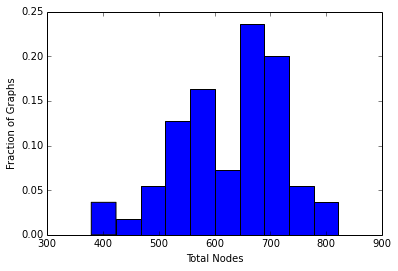

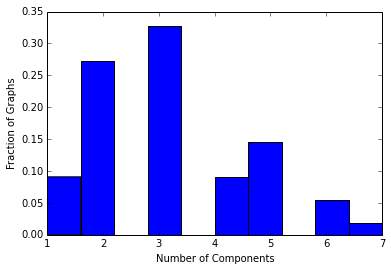

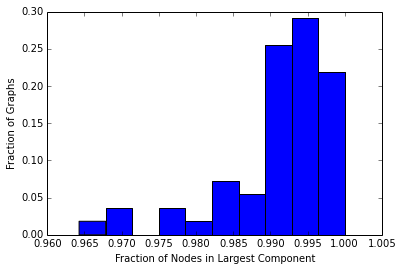

In [3]:
graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, processedDataDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

#### Reducing Graphs to Their Largest Component

Cool! The third histogram shows that the largest component of each graph contains at least 90% of the metabolites (nodes) in the graph. I chose not to consolidate our graphs

We don't need to consolidate our graphs and can analyze in each individually. The following code section reduces each graph to its largest connected component.

In [4]:
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)

Reducing to largest component


#### Computation of Seed Sets

Recall the definition of a seed set: the set of compounds that, based on metabolic network topology, are exogenously acquired for growth. Formally, the seed set of a network is the minimal subset of compounds (nodes) that cannot be synthesized from other compounds in the network, and whose presence in the environment permits the production of all other compounds in the network. In other words, the seed set of a network is a set of nodes from which all other nodes can be reached.

The seed set detection algorithm decomposes the metabolic network into its strongly connected components. This decomposition enables the seed set detection problem to be reduced to the problem of detecting source components in the condensation of the original network. What on earth does that mean?

A strongly connected component (SCC) of a directed graph is a subgraph such that every vertex is reachable from every other vertex. By definition, a vertex is automatically reachable from itself, so an SCC can contain only a singoe component. Consider the network below. The three SCCs of this graph are indicated with different colors. 

![Strongly connected components](files/imageFiles/RE-graphSCCs.png)

Let's take a closer look at the orange component. For each vertex, the figure below shows the paths by which the other three vertices can be reached.

![Paths through an SCC](files/imageFiles/RE-graphSCCPaths.png)

To generate the condensation of a graph, each SCC is contracted to a single vertex. The figure below shows condensation of the above graph (nodes A to H). Then, source components (nodes with no incoming edges) are identified. Such components are circled in purple. Starting from these nodes, paths can be drawn to fully connect the condensed graph.

![Condensation of a graph](files/imageFiles/RE-graphCondensation.png)

To find the seed sets, each source component in the condensation is then expanded to its original nodes. Because each vertex of the condensation is an SCC of the original graph, each vertex of the condensation contains a set of "equivalent nodes", meaning that each node can be reached from the others. Thus, the original graph has two seed sets, one containing compound A, and the other containing compounds F, G, and H. The figure below shows how all nodes can be reached starting from nodes A and H.

![Path from seed nodes to all nodes](files/imageFiles/RE-graphSeedSets.png)

Thus, the seed set detection algorithm contains four steps.
1. Identify the SCCs of the (directed) network graph
2. Use the SCCs to derive the condensation of the original graph
3. Identify source components in the condensation
4. Expand each source component of the condensation into its original node

Seed compounds can also have weights associated with them. For a seed compound belonging to a source component of size n, its weight is 1/n. Thus, in the example above, the seed compound 'A' has a weight of 1, and the compounds {F, G, H} each have weight 1/3.

The code below performs the four steps shown above for the metabolic network graph of each genome. The seed compounds for each graph are written to a file, with each line in the file containing a set of equivalent seed compounds. The code also plots histograms of the number and size of the seed sets against network size.

Computing seed sets


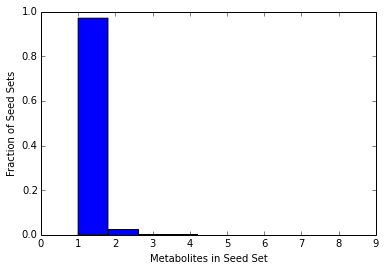

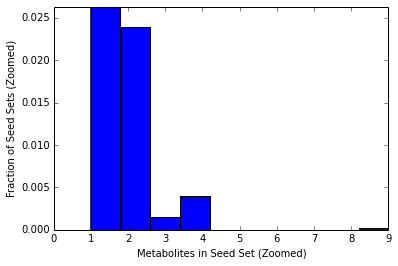

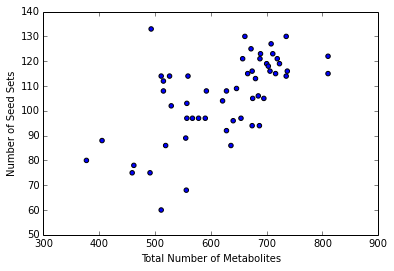

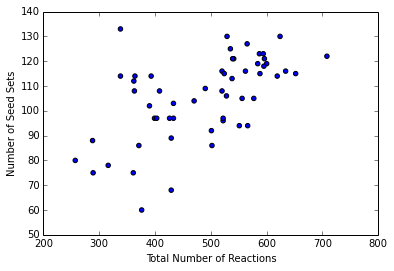

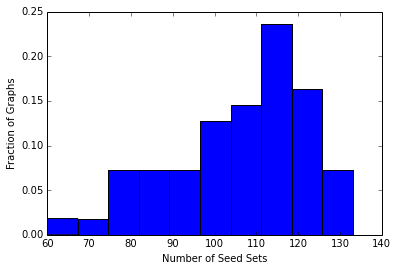

In [5]:
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
gf.plotSeedStats(seedSetList, reducedGraphStatArray, modelStatArray)

#### Working with Seed Sets

Now that the seed sets for each genome have been computed, we want to analyze them. The functions below:
- write a single matrix for seed compounds for all genomes
- compute the fraction of genomes in which each seed compound appears

In [6]:
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

Consolidate seed sets
Computing normalized seed counts


#### Clustering Seed Sets

Not only do we want to look at the compounds in each seed set, but also phylogenetic patterns of the compounds. One way to get started is to perform a cluster analysis on a weighted matrix of the seed compounds. The following code snippet performs and visualizes such an analysis, using a Euclidean distance metrix and average linkage (UPGMA) clustering.

Computing dendrogram


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371 UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


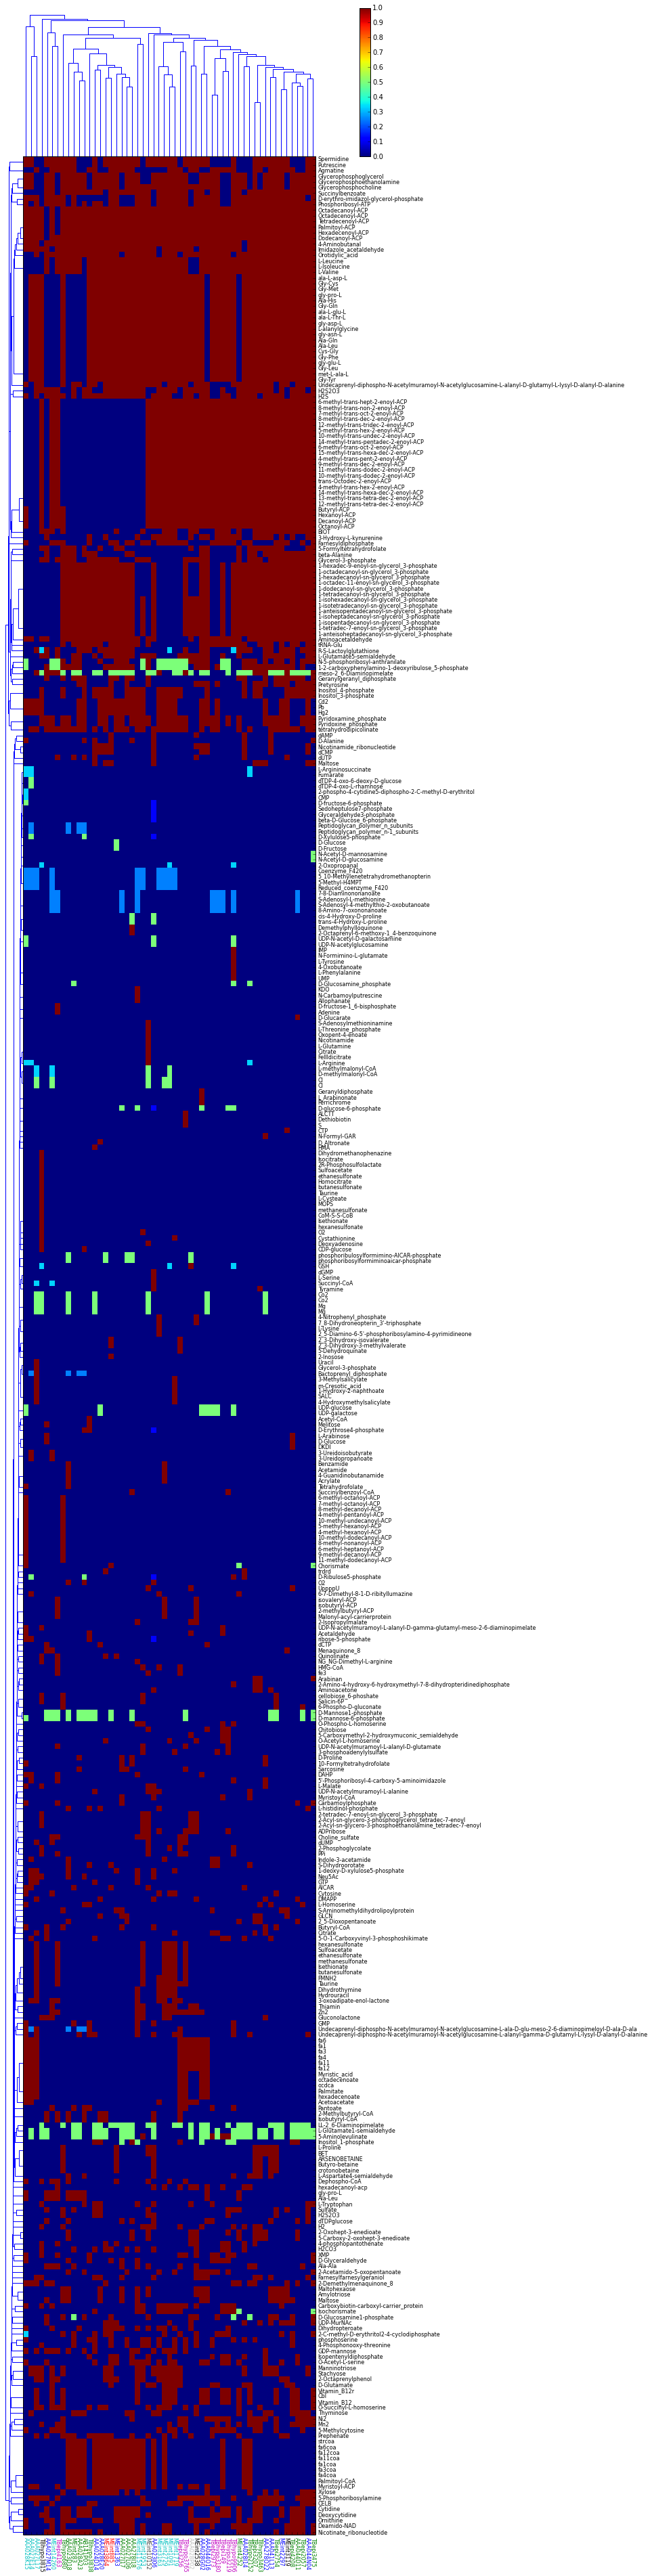

In [7]:
ef.clusterSeedSets(seedMatrixDF, dirList, externalDataDir, summaryStatsDir, 'taxonomy.csv')

Genomes in the above clustergram are colored as follows:

acI-A: blue  
acI-B: green  
acI-C: red  
acIII: yellow  
acIV: cyan  
acV: magenta  
Luna1: dark gray  
Myco: light gray  
Unknown: black  

The clustering itself is hard to visualize because the heatmap is so large. Just draw the dendrogram with labels.

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1004 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1011 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.


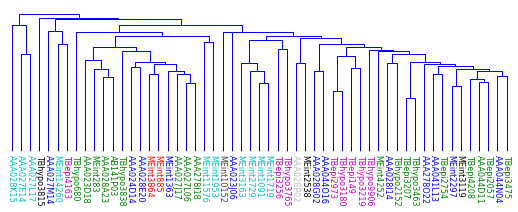

In [8]:
ef.clusterOnly(seedMatrixDF, dirList, externalDataDir, 'taxonomy.csv')

Here is the coloring again:

acI-A: blue  
acI-B: green  
acI-C: red  
acIII: yellow  
acIV: cyan  
acV: magenta  
Luna1: dark gray  
Myco: light gray  
Unknown: black  

#### Sanity Check of Seed Compound Clustering

I tasked my SURE-REU student Brittany Brown with performing a sanity check of the predicted seed compounds for the acI genomes. To do so, Brittany examined each of the seed compounds in classified them into the following categories:
* Amino Acids  
* Peptides  
* Polyamines  
* Nucleotides & Coenzymes  
* Fatty Acid  
* Carbohydrates  
* Carboxylic Acids 
* Lipids  
* Carbs, Pentoses  
* Sulfur Utilization  
* Unknown  

For each compound, Brittany computed the fraction of genomes for which each compound was a seed. She then examined the major COG categories found in each genome, as reported for the 11 acI genomes in Trevor's ISME paper. Highlights of her finding include:

* Among the amino acid compounds, the branched-chain amino acids are predicted to be seed compounds in over 90% of the genomes. This dovetails nicely with Trevor's finding of COGs associated with branched-chain amino acid uptake in over 90% of the genomes.
* Also among the amino acid compounds, the following were predicted to be seeds: ornithine (59%), proline (29%), tryptophan (24%). This agrees with  Trevor's finding of COGs associated with amino acid uptake in about 25% of the genomes. Interestingly, beta-alanine (76%) and D-alanine (35%) D-proline (24%) were also predicted to be seeds.
* Di-amines were predicted to be seed compounds in 71% of genomes. This agrees with Trevor's finding of COGs associated with dipeptide transporters in 55 to 73% of genomes. 
* Among poly-amines, putrescine and spermidine were predicted to be seeds in 71% of genomes. This is slightly lower than Trevor's finding of spermidine/putrescine transport COGs in 82% of his genomes.
* The frequency of carbohydrates as seed compounds is considerably less than the abundance of COGs related to sugar transport. Carbohydrate compounds are predicted to be seeds in a most 47% of genomes, while COGs for sugar-transport are found in over 90% of genomes. This suggests acIs may be adapted to take advantage of carbohydrates during periods of abundance but do not generally rely on them for carbon.
* Sulfur utilization. H2S is predicted to a seed in 88% of genomes. Sulfate and sulfite are not predicted to be seed compounds. This provides support for Trevor's hypothesis that S incorporation into cysteine provides the S for acI metabolism.
* Genome incompleteness. There is considerable evidence for genome incompleteness affecting seed set predictions, as many compounds known to be pathway intermediates are showing up as seed compounds.

#### TO DO
1. Examine the list in more detail for interesting and/or mis-classified compounds which might warrant further investigation.

#### Role of Fatty Acids in Seed Set Clustering

Clustering in the above dendrogram is strongly influenced by a small fraction of the compounds, mainly intermedaites in fatty acid and phospholipid biosynthesis, which are present/absent in a large number of graphs. Given that these are absent in genomes spanning a range of taxa, I suspect this is an artifact of (in)completeness.

I want to investigate the presence/absence of fatty acid and phoshpolipid intermediates in the seed sets a bit further. First, some background on fatty acid biosynthesis.

In the first step of fatty acid biosynthesis, molecules of acetyl-CoA and malonyl-CoA molecule are primed (steps and (b)) and condensed (steps (c)) to form acetoacetyl-CoA. Steps (d) to (f) then reduce, dehydrate, and reduce this molecule to butryl-ACP. In subsequent steps, malonyl-CoA molecules are primed (step (b)) and added to the growing acyl-ACP (steps (c) to (f)) until the 16-carbon fatty acid palmitoyl-CoA is formed.

![Fatty Acid Biosynthesis](files/imageFiles/Saturated_Fatty_Acid_Synthesis.png)

Thus, the four-step cycle of (c) to (f) occurs 7 times, extending the initial 2-C acetyl-CoA molecule to the 16-C palmityl-CoA. **The point here is that the enzymes in fatty acid biosynthesis have broad specificity and will be associated with a large number of reactions.** In a model where all of the enzymes are present, no fatty acid molecules would appear as seed compounds. Conversely, in a model where an enzyme is missing, I expect the seed set to contain all the products of that enzyme. Thus, I suspect that I am seeing clusters of fatty acid (intermediates) in seed sets because one or more of the fatty acid biosynthesis genes are missing from the metabolic models. The enzymes involved in phospholipid biosynthesis have similarly broad specificity, and I expect to see similar clustering due to absent genes.

Visual inspection of the dendrogram above reveals six clusters containing metabolites involved in fatty acid or phospholipid biosynthesis. I developed a Python script to identify the reactions which produce and consume these metabolites. Reactions were traced back to their genes (via annotations) and reactions common across models were identified. The annotations were:

I developed a Python script to identify the reactions which produce and consume these metabolites. Reactions were traced back to their genes (via annotations) and reactions common across models were identified. The annotations were:

2.3.1.5: acyl-CoA:1-acyl-sn-glycerol-3-phosphate 2-O-acyltransferase  
* 16 reactions
* responsible for four of six clusters
    
1.3.1.9: acyl-[acyl-carrier protein]:NAD+ oxidoreductase  
* 25 reactions
* responsible for two of six clusters

TC 3.A.1.5.1: oligopeptide ABC transporter
* 19 reactions
* responsible for final (seventh cluster)

The enzyme with EC 1.3.1.9 participates in fatty acid biosynthesis, while that with EC 2.3.1.15 participates in phospholipid biosynthesis. I developed a function to remove these reactions from the models (dirListToAdjacencyListWithRemoval), effectively pushing seed compounds "upstream:" i.e., the seed compounds should be the end-products of phospholipid biosynthesis and be shared by all the models. Let's see the effect:

Converting SBML files to adjacency lists
Computing graph statistics
Reducing to largest component
Computing seed sets
Consolidate seed sets
Computing normalized seed counts
Computing dendrogram


cobra/core/Model.py:306 UserWarning: need to pass in a list


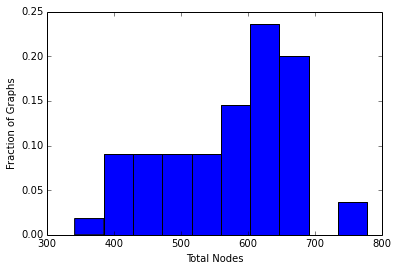

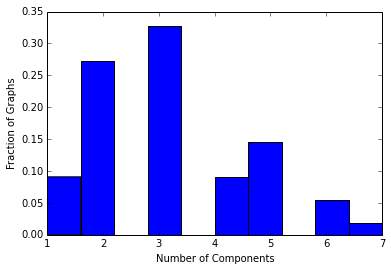

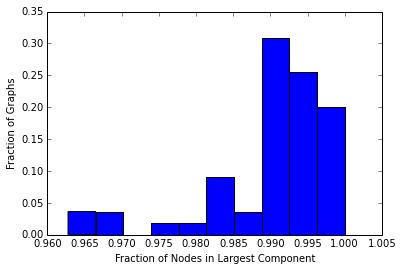

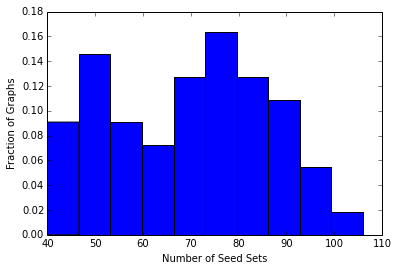

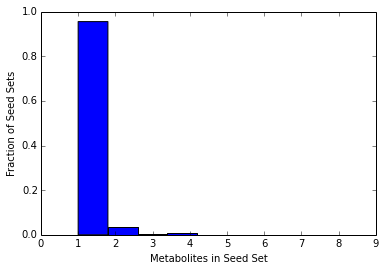

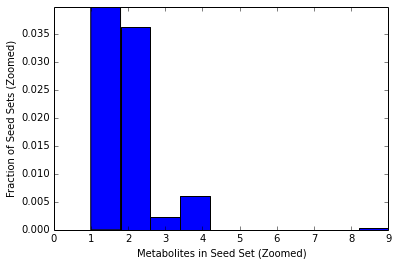

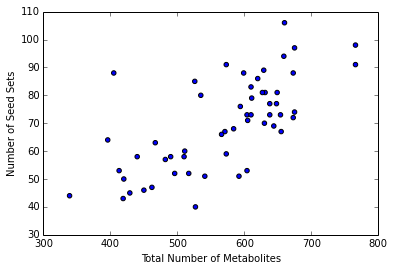

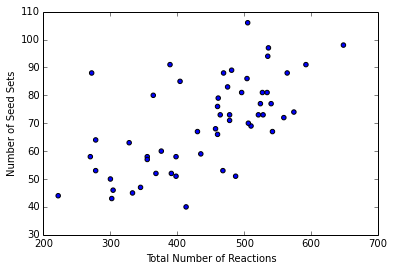

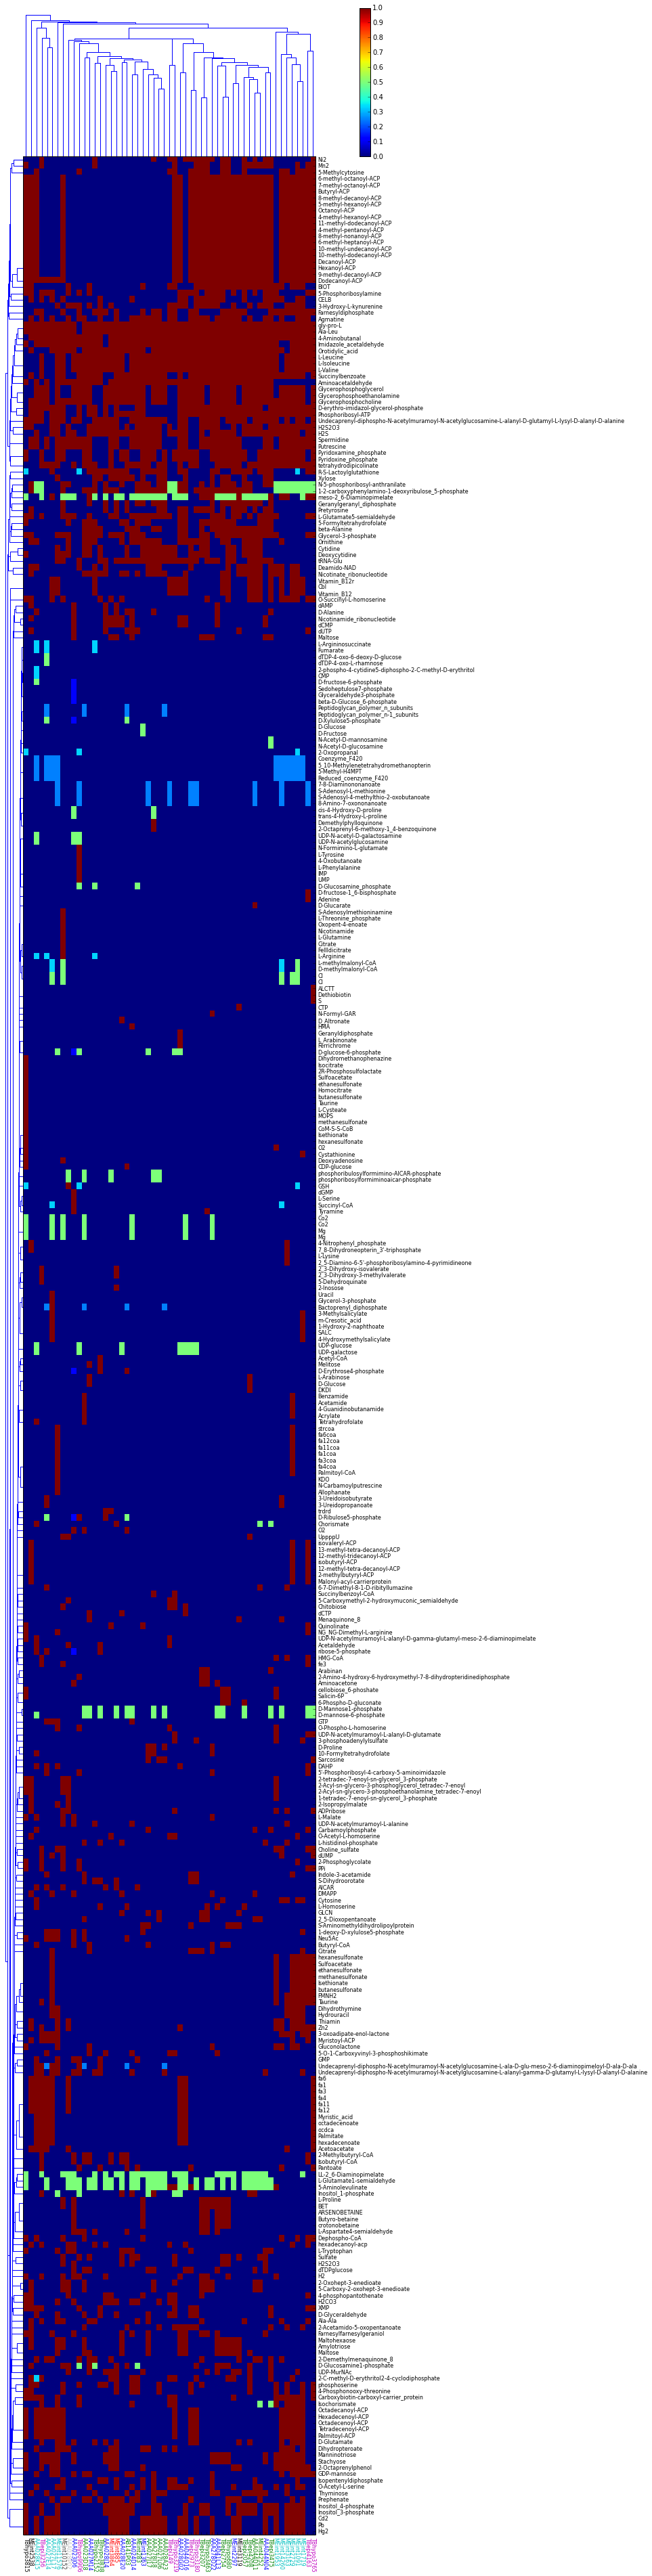

In [9]:
# Convert SBML model files to adjacency lists
modelStatArray = sf.dirListToAdjacencyListWithRemoval(dirList, externalDataDir, processedDataDir, summaryStatsDir)

# Compute statistics on the size of metabolic network graphs
graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, processedDataDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

# Reduce network graphs to their largest component
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)

# Compute seed sets
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
gf.plotSeedStats(seedSetList, reducedGraphStatArray, modelStatArray)

# Aggregate seed sets for all models and write to file
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)

# Calculate normalized counts of seed metabolites
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

# Construct heatmap of seed metabs. Cluster seed profiles and create dendrogram
ef.clusterSeedSets(seedMatrixDF, dirList, externalDataDir, summaryStatsDir, 'taxonomy.csv')

Indeed, this is what I observe. The clustering in the dendrogram is no longer clearly "dominated" a few compounds. Instead, a new cluster of compounds involved in FA biosynthesis pops out, suggesting the appearance of these clusters is due to incompleteness in the networks. Good evidence to move on w/ merging networks based on taxonomy and ANI.

#### TO DO:
* Develop a pipeline for merging metabolic reconstructions to obtain metabolic reconstructions with higher completeness. Rerun the clustering to see if the clustering more strongly reflects the phylogeny.


### Computation of Reverse Ecology Metrics

Reverse ecology theoreticians have developed a number of metrics which provide qualitative insights into the ecology of microorganisms. This section is concerned with computing those metrics and using them to infer traits about freshwater actinobacteria.

Before running, it's necessary to recompute the seed sets with the full complement of reactions.

In [10]:
# Convert SBML model files to adjacency lists
modelStatArray = sf.dirListToAdjacencyListWithRemoval(dirList, externalDataDir, processedDataDir, summaryStatsDir)
# Reduce network graphs to their largest component
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)
# Compute seed sets
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
# Aggregate seed sets for all models and write to file
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)
# Calculate normalized counts of seed metabolites
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

Converting SBML files to adjacency lists
Reducing to largest component
Computing seed sets
Consolidate seed sets
Computing normalized seed counts


#### Computation of Metabolic Competition

I would also like to compute the metabolic competition scores between all pairs of SAGs and GFMs. Clustering the genomes based on these scores could potential competitive interactions between tribes.

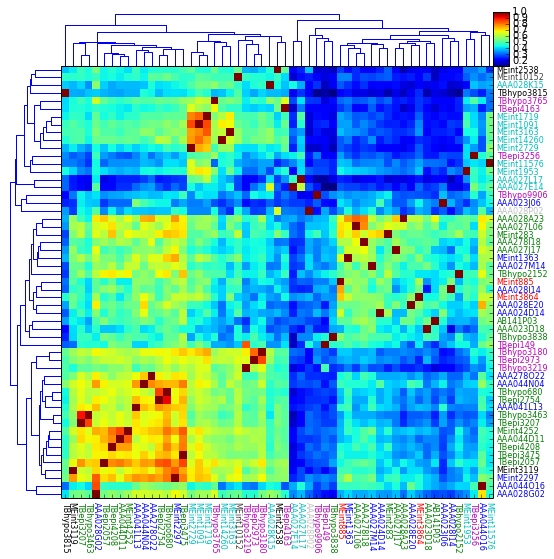

In [11]:
metabCompeteDF = ef.computeMetabCompete(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabCompeteDF, dirList, externalDataDir, summaryStatsDir, 'taxonomy.csv', 'metabolicCompetition.png')

#### Computation of Metabolic Complementarity

I would also like to compute the metabolic complementarity scores between all pairs of SAGs and GFMs. Clustering the genomes based on these scores could potential cooperative interactions between tribes.

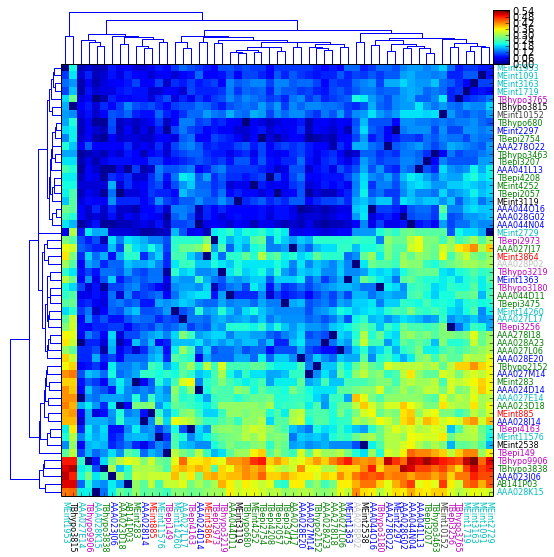

In [12]:
metabComplementDF = ef.computeMetabComplement(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabComplementDF, dirList, externalDataDir, summaryStatsDir, 'taxonomy.csv', 'metabolicComplementarity.png')

#### TO DO:
2. Perform a detailed analysis of the seed sets. Compare to what we know about acI from Sarahi and Trevor's papers.
4. Write code to calculate scope.
5. Write code to compute metrics which depend on both seed and scope.
